In [201]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

import pylab # this allows you to control figure size
pylab.rcParams['figure.figsize'] = (15.0, 10.0)

In [208]:
import os

lista = []
lista_nombres = []
directorio_base = 'imagenes'

for directorio_actual, subdirectorios, archivos in os.walk(directorio_base):
    for name in archivos:
        lista.append(os.path.join(directorio_actual, name))
        lista_nombres.append(os.path.basename(directorio_actual))  # Obtener el nombre del directorio actual

print(lista_nombres)

['biden', 'biden', 'biden', 'biden', 'biden', 'cr', 'cr', 'cr', 'cr', 'cr', 'cr', 'obama', 'obama', 'obama', 'obama', 'obama', 'trump', 'trump', 'trump', 'trump', 'trump', 'trump']


In [209]:

# filas = 5
# columnas = 5
# fig, axs = plt.subplots(filas, columnas, figsize=(15, 15))
# for i, img_path in enumerate(lista):
#     fila = i // columnas
#     columna = i % columnas
#     img = cv.imread(img_path)
#     img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
#     axs[fila, columna].imshow(img)
#     axs[fila, columna].axis('off')
#     axs[fila, columna].set_title(f'{img_path}')
# plt.tight_layout()
# plt.show()

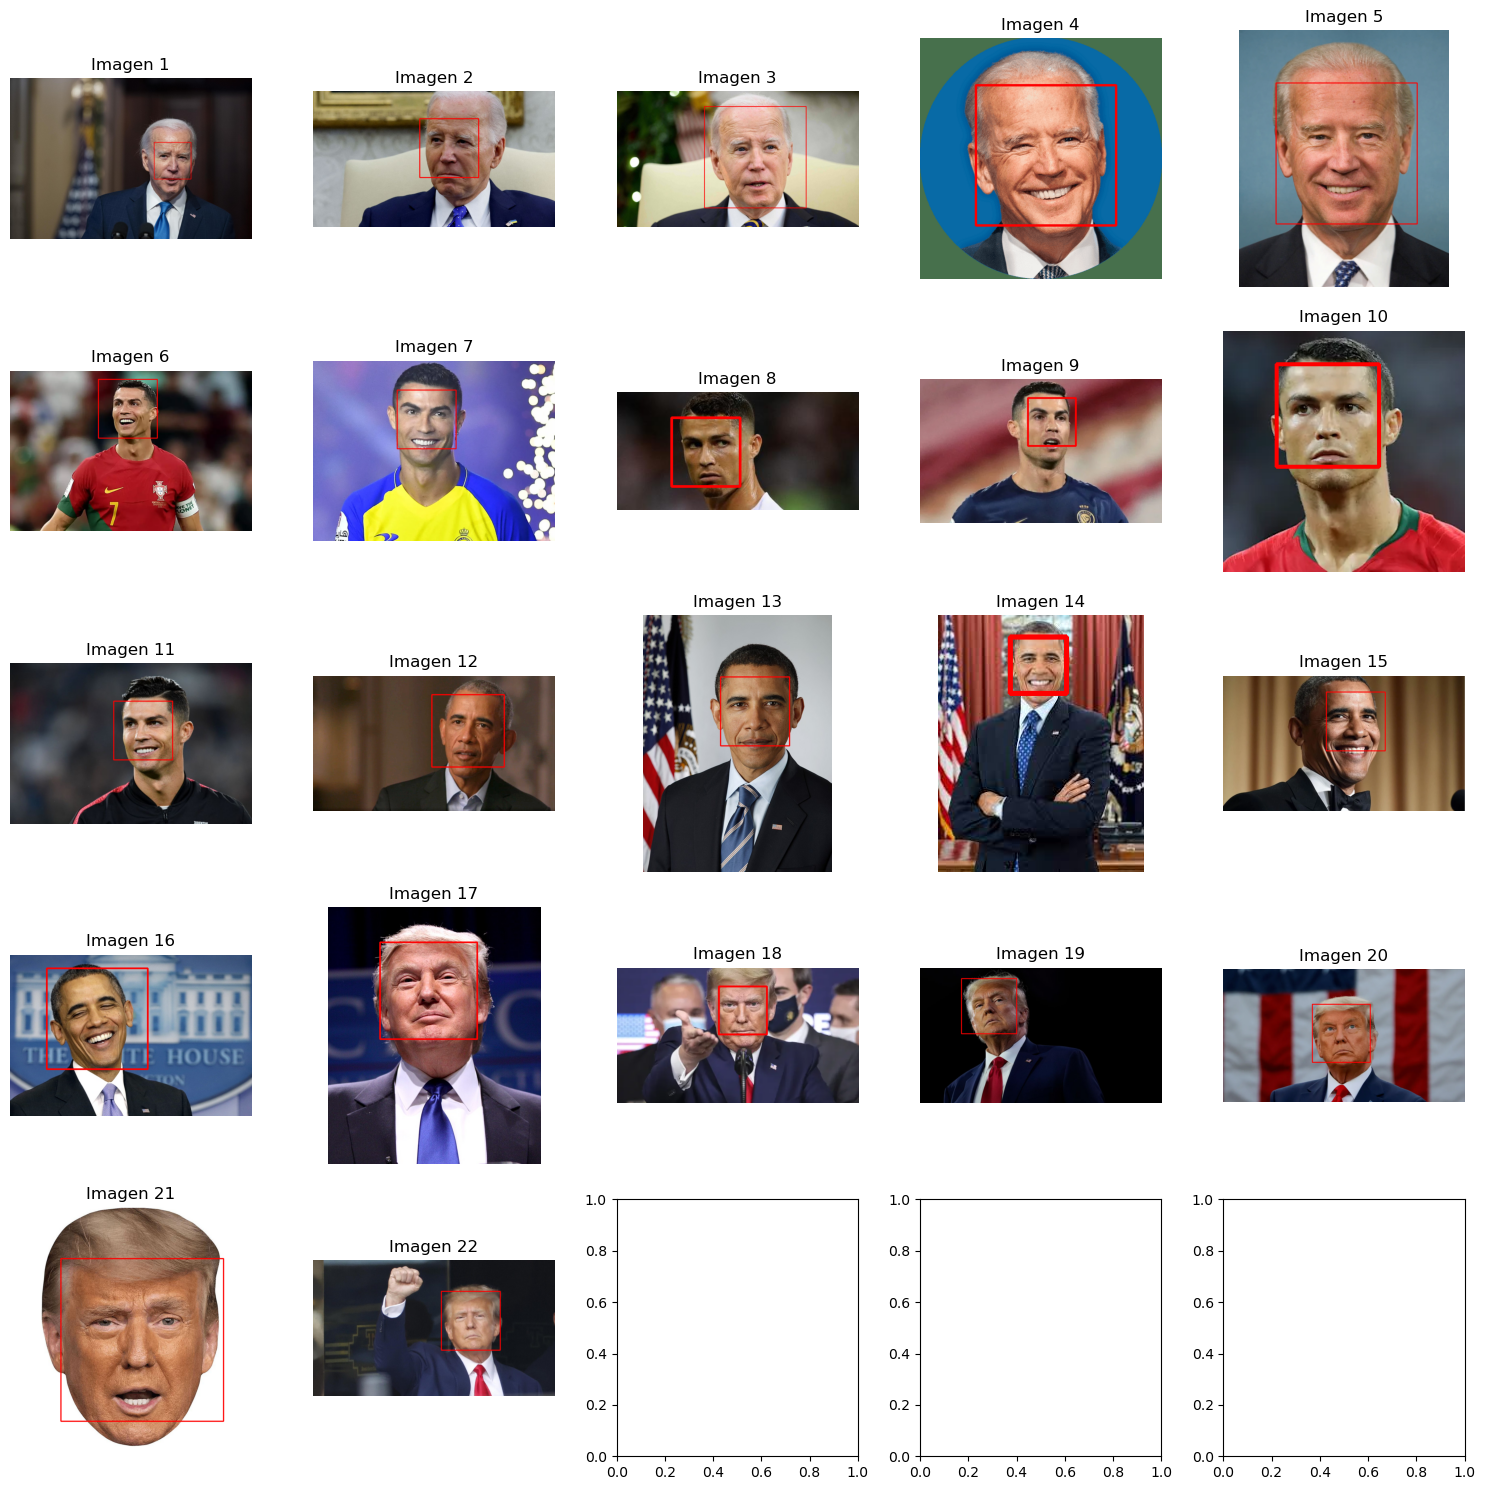

In [210]:
filas = 5
columnas = 5
lista_rois=[]
fig, axs = plt.subplots(filas, columnas, figsize=(15, 15))
for i, img_path in enumerate(lista):
    fila = i // columnas
    columna = i % columnas
    img1 = cv.imread(img_path)
    face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gris = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
    caras = face_cascade.detectMultiScale(gris, 2.3, 1)
    img2 = img1.copy()
    for (x,y,w,h) in caras:
        cv.rectangle(img2, (x,y), (x+w, y+h), (0,0,255), 4)
        roi = gris[y:y+h, x:x+w]
        lista_rois.append([roi,img_path])
        roi_color = img2[y:y+h, x:x+w]
    axs[fila, columna].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
    axs[fila, columna].axis('off')
    axs[fila, columna].set_title(f'Imagen {i+1}')
plt.tight_layout()
plt.show()

In [206]:
lista_rois[0][1]

'imagenes\\biden\\baiden1.jpg'

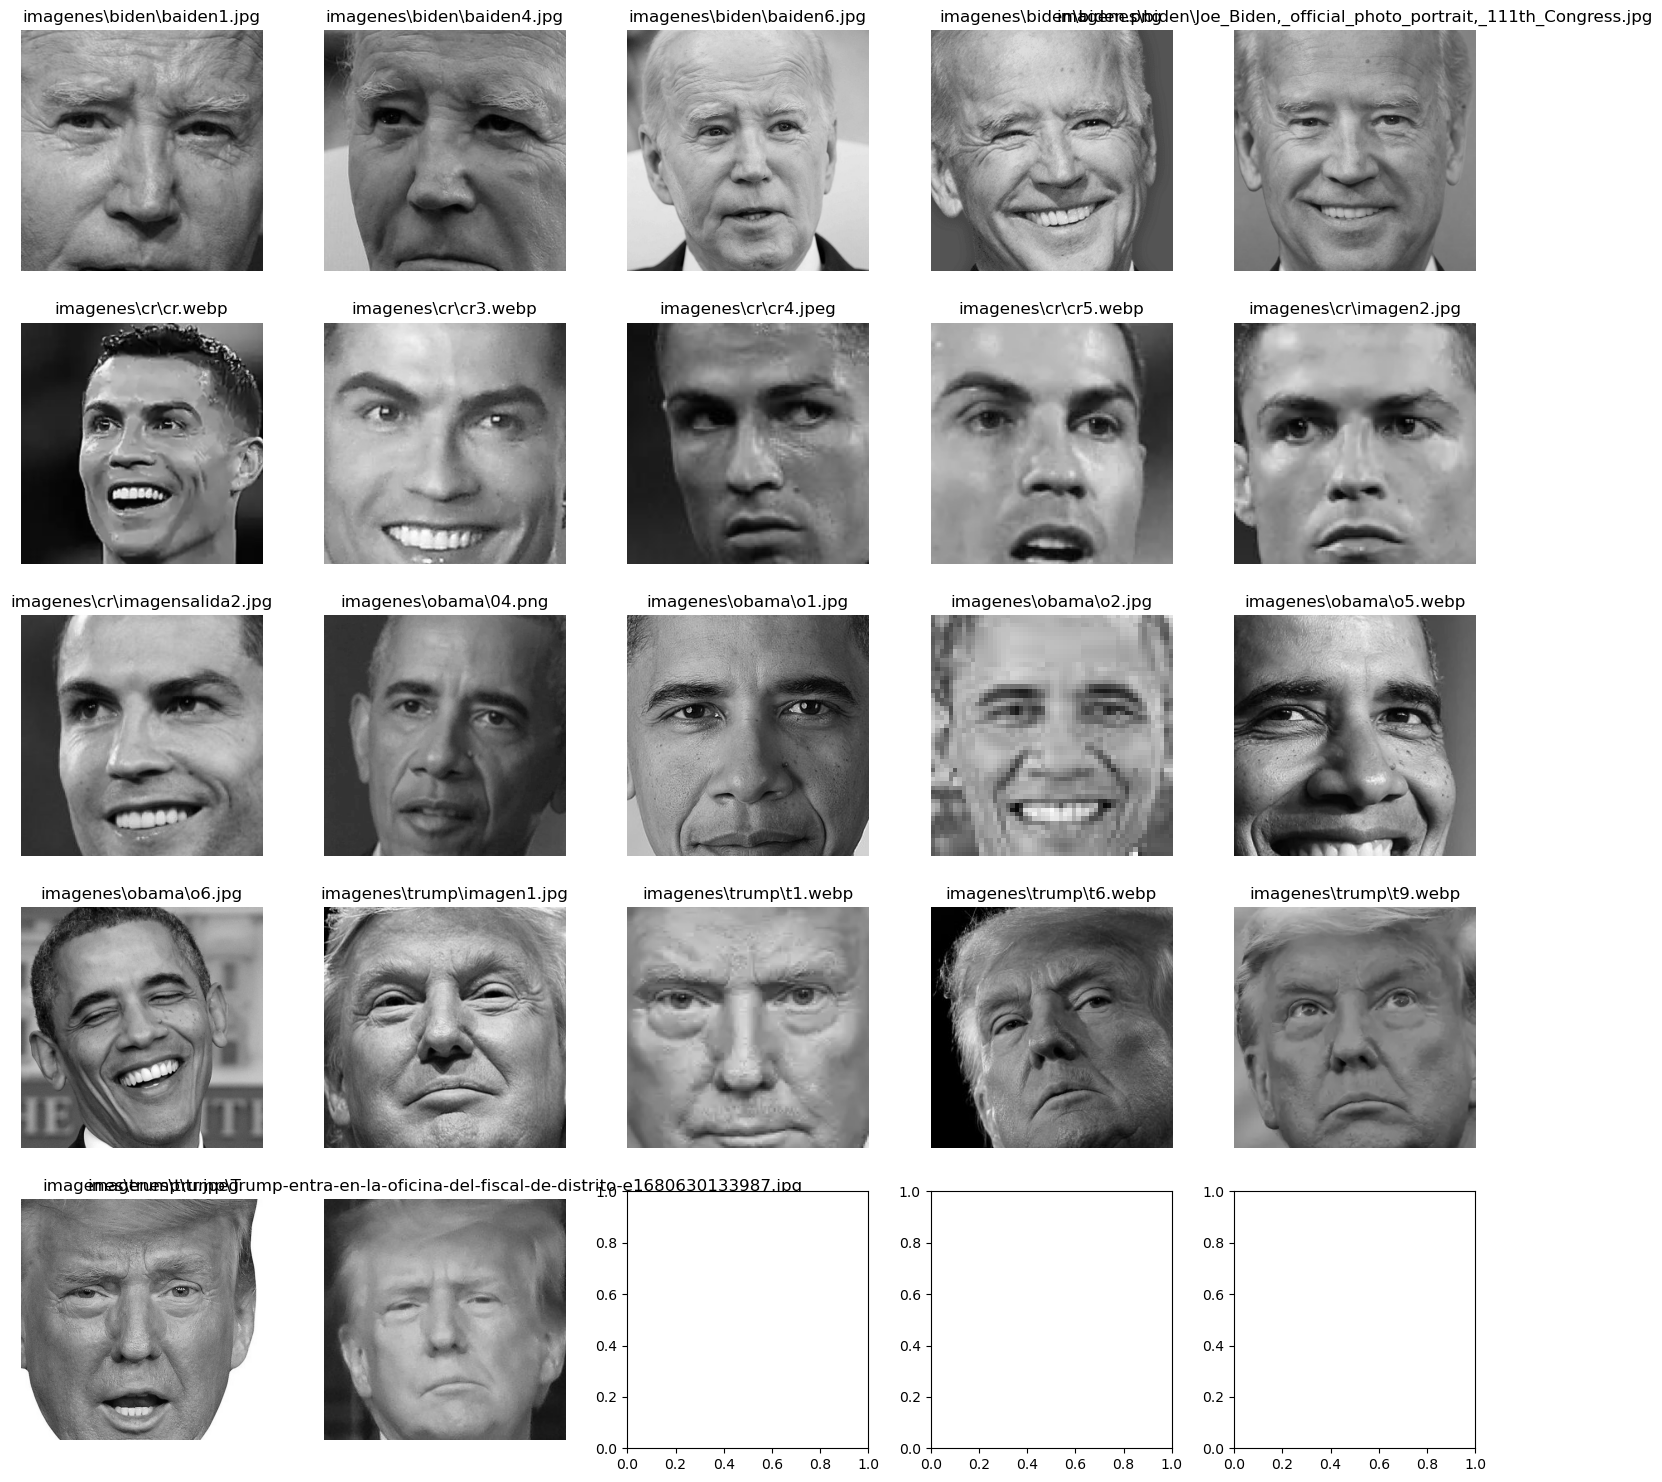

In [211]:
filas = 5
columnas = 5
fig, axs = plt.subplots(filas, columnas, figsize=(15, 15))
for i, roi in enumerate(lista_rois):
    fila = i // columnas
    columna = i % columnas
    axs[fila, columna].imshow(cv.cvtColor(roi[0], cv.COLOR_BGR2RGB))
    axs[fila, columna].axis('off')  
    axs[fila, columna].set_title(f'{roi[1]}')
plt.tight_layout()
plt.show()

In [212]:

d = {}
numero = 0
for n in lista_nombres:
    if n not in list(d.keys()): 
        d[n] = numero
        numero += 1
lista_y = [d[n] for n in lista_nombres]
lista_y


[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3]

In [213]:
listafinal=[]
for roi in lista_rois:
    listafinal.append(roi[0])

listafinal

[array([[103,  95,  95, ...,  99,  96,  88],
        [126, 131, 139, ..., 100, 103,  99],
        [155, 156, 158, ..., 102,  99,  96],
        ...,
        [106,  96,  95, ...,  31,  31,  32],
        [ 97, 100, 100, ...,  31,  31,  32],
        [103, 120, 123, ...,  31,  31,  32]], dtype=uint8),
 array([[110, 112, 113, ..., 144, 158, 156],
        [104, 106, 106, ..., 136, 148, 155],
        [ 97,  98,  99, ..., 130, 132, 139],
        ...,
        [186, 188, 188, ..., 134, 133, 132],
        [186, 188, 188, ..., 132, 132, 130],
        [185, 187, 187, ..., 128, 128, 128]], dtype=uint8),
 array([[108, 110, 112, ..., 153, 155, 152],
        [106, 108, 110, ..., 155, 156, 154],
        [109, 108, 105, ..., 154, 152, 152],
        ...,
        [179, 178, 178, ..., 129, 134, 138],
        [169, 167, 167, ...,  98, 107, 110],
        [158, 154, 154, ...,  69,  68,  71]], dtype=uint8),
 array([[ 95, 102,  93, ...,  84,  84,  84],
        [ 95,  95,  93, ...,  84,  84,  84],
        [ 93,  9

In [214]:
print(len(lista_y))
print(len(listafinal))

22
22


In [215]:
import cv2 as cv
from sklearn.model_selection import train_test_split
lbph_face_classifier = cv.face.LBPHFaceRecognizer_create()
xtrain=np.array(listafinal, dtype=object)
ytrain=np.array(lista_y, dtype=int)
lbph_face_classifier.train(xtrain,ytrain)

In [218]:
def entreno(cadena):
    imagen_entrada = cv.imread(cadena) 
    face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gris = cv.cvtColor(imagen_entrada, cv.COLOR_BGR2GRAY)
    caras = face_cascade.detectMultiScale(gris, 2.3, 1)
    img2 = imagen_entrada.copy()
    for (x,y,w,h) in caras:
        cv.rectangle(img2, (x,y), (x+w, y+h), (0,0,255), 4)
        roi = gris[y:y+h, x:x+w]
        roi_color = img2[y:y+h, x:x+w]


    label_predicted, confidence = lbph_face_classifier.predict(roi)
    # plt.imshow(roi,cmap='gray')
    if label_predicted==1:
        nome='cr'
    elif label_predicted==2:
        nome='obama'
    elif label_predicted==3:
        nome='trump'
    elif label_predicted==0:
        nome='biden'

    print("Etiqueta Predicha:", nome)
    print("Confianza:", confidence)

entreno('cara.png')

Etiqueta Predicha: cr
Confianza: 66.5353329245932
